<a href="https://colab.research.google.com/github/HugoKD/Abalone_projet/blob/master/SoutenanceMAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problème de regression, à partir des features on doit predire 4 targets possibles (y1,y2,y3,y4)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Data Analyses + Preprocessing

In [3]:
X = pd.read_csv("data_Features.csv").drop("time", axis=1)
y = pd.read_csv("data_Targets.csv")[["Y1"]]

In [4]:
y.info(), X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y1      2556 non-null   int64
dtypes: int64(1)
memory usage: 20.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t2m     2556 non-null   float64
 1   u10     2556 non-null   float64
 2   v10     2556 non-null   float64
 3   SST     2556 non-null   float64
 4   SIC     2556 non-null   float64
 5   r1_MAR  2556 non-null   float64
 6   r2_MAR  2556 non-null   float64
 7   r3_MAR  2556 non-null   float64
 8   r4_MAR  2556 non-null   float64
 9   r5_MAR  2556 non-null   float64
dtypes: float64(10)
memory usage: 199.8 KB


(None, None)

In [5]:
print(y.Y1.describe())
## More than 75% of data is null ..

count    2556.000000
mean        3.525430
std        18.977537
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       433.000000
Name: Y1, dtype: float64


In [6]:
## Step 1 : See how the label are distributed bc we will have to transform them
## Step 2  : See the skewness of features -> huge impact on model performance

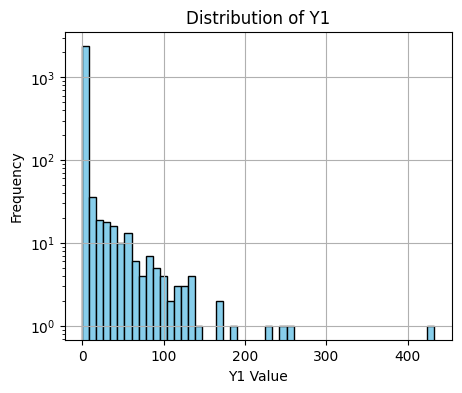

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.hist(y, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Y1')
plt.xlabel('Y1 Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
plt.show()

In [8]:
## Choix du threshold

In [9]:
nbr0 = y.value_counts()[0]/len(y)
print(nbr0) #8849765258215962

0.8849765258215962


In [10]:
#Conversion des données
threshold =  y.Y1.mean()
y_transform = y.Y1.apply(lambda x : 0 if x<=0 else 1)
print(y_transform.value_counts())

Y1
0    2262
1     294
Name: count, dtype: int64


In [11]:
## Données largement désiquilibrées
# Data Augmentation

88% de nos données sont à 0, le choix du threshold serait donc {y<=0} = 0, {y>0} = 1

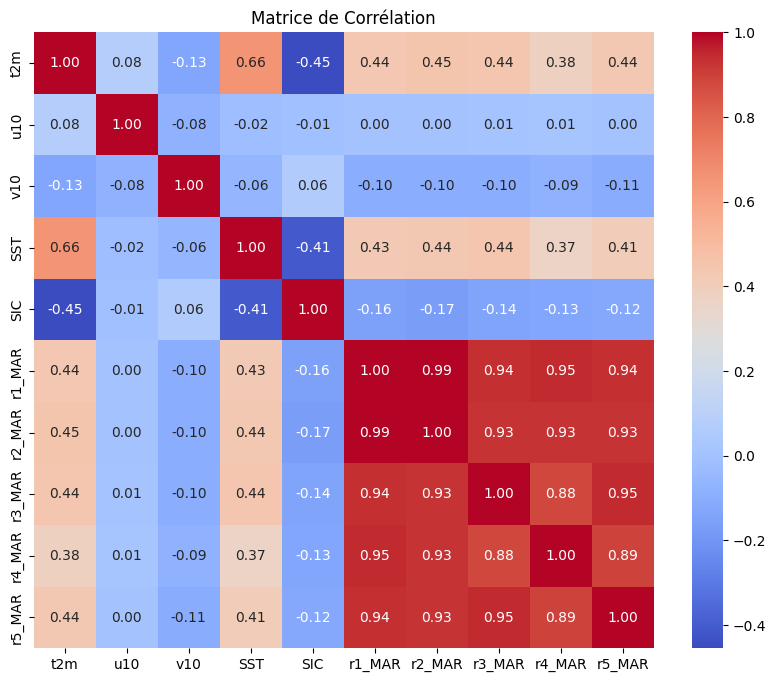

In [12]:
#Matrice de corrélation

plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [13]:
##Possibilité de se limiter à 1 Ri_MAR au vu de la forte corrélation entre ces variables
##Possibilité de réduire la dimension de l'espace des variables aussi
## Tester une PCA sur ri_MAR pour l'a reduire à une seule dimension

In [14]:
## Attention a la fuite de données (data leakage) et la transformation des données

In [15]:
## Problème sur les var : t2M,SIC et toutes les ri_MAR

In [16]:
## On peut se limiter à max min, box cox, et log transformation pour normalsier les données

In [17]:
## Important de distinguer les valeurs abérantes des valeurs normalements sur abondante -> on ne veut pas changer la distribution non plus

In [18]:
## Stratégie de data augmentation, de stratify ou de cross volidation pour faire faire au désiquibrage des classes

In [19]:
## Ce sera sans doute un ensemble model qui sera le plus puissant

In [20]:
## Faire un cas simple, type RF

In [21]:
X_transform = X.drop(['r5_MAR','r3_MAR','r4_MAR','r2_MAR'],axis = 1)

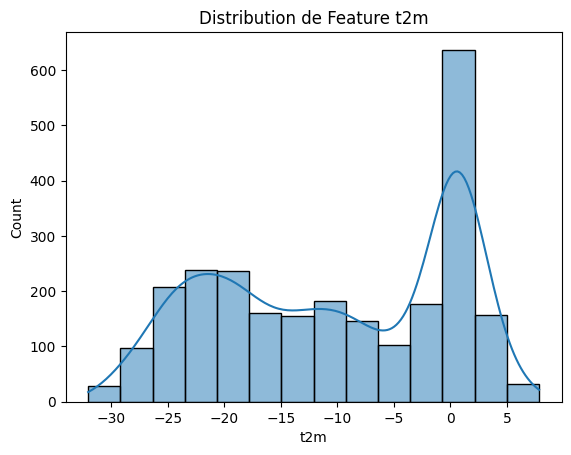

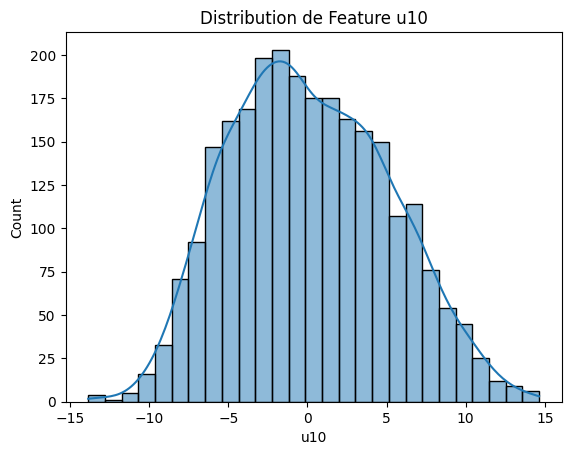

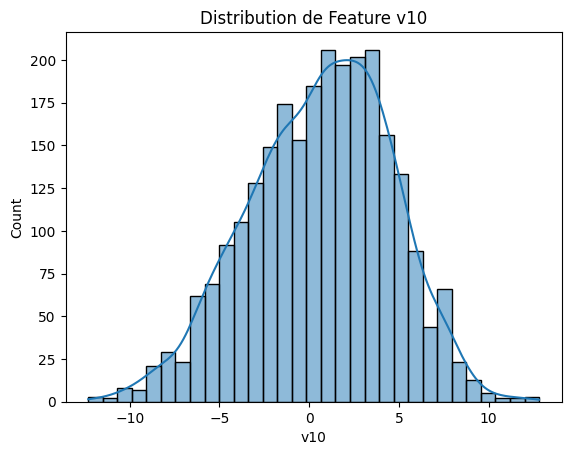

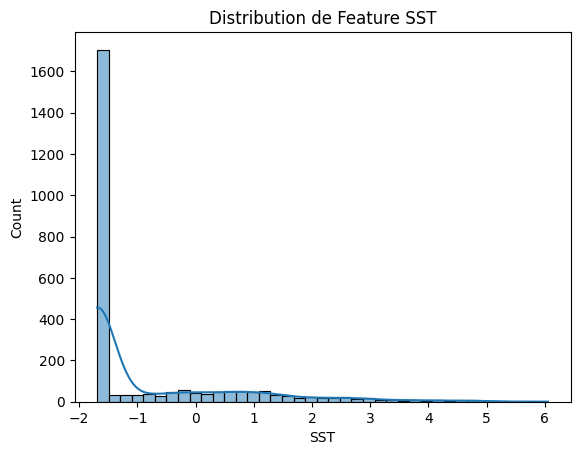

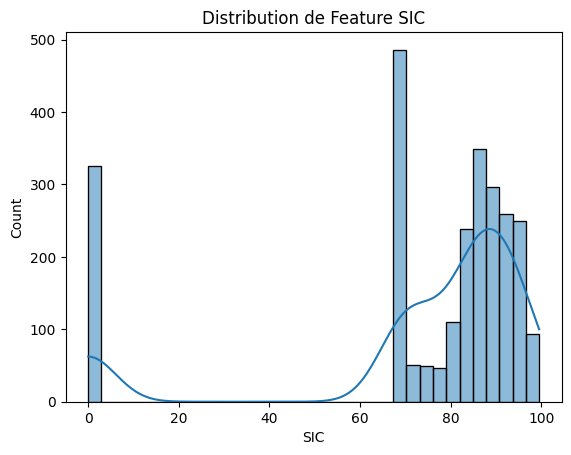

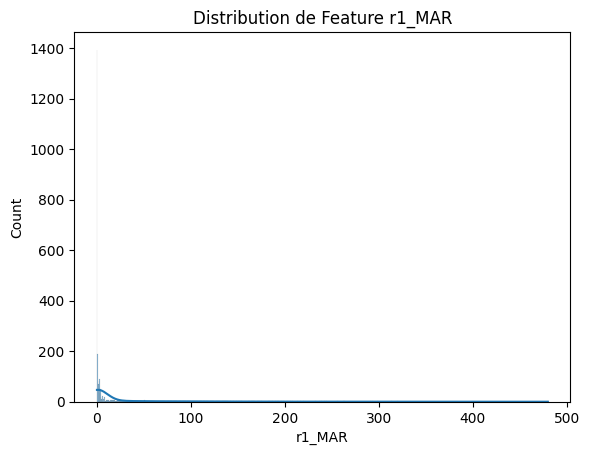

In [22]:
for c in (X_transform.columns):
    sns.histplot(X[c], kde=True)
    plt.title('Distribution de Feature' +' ' + str(c))
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


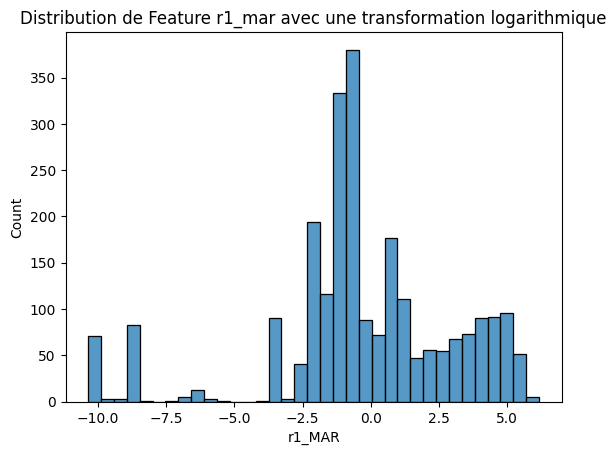

In [23]:
sns.histplot(np.log(X['r1_MAR']))
plt.title('Distribution de Feature' +' r1_mar ' + 'avec une transformation logarithmique' )
plt.show()

<Axes: title={'center': 'Distribution de r1_MAR avec une transformation Box-Cox'}, ylabel='Count'>

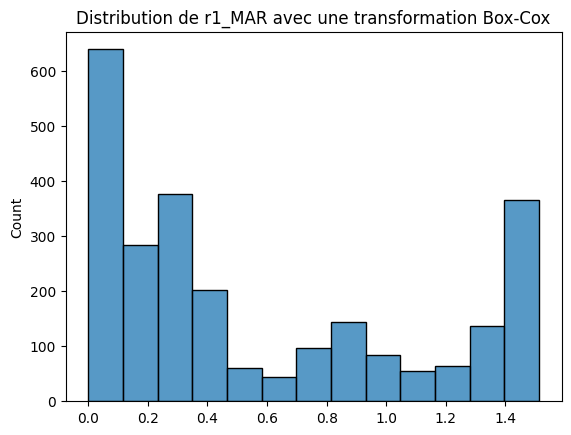

In [50]:
X_r1_MAR_boxcox = stats.boxcox(X['r1_MAR']+1)[0]
plt.title('Distribution de r1_MAR avec une transformation Box-Cox')
sns.histplot(X_r1_MAR_boxcox) #box plot semble plus puissant

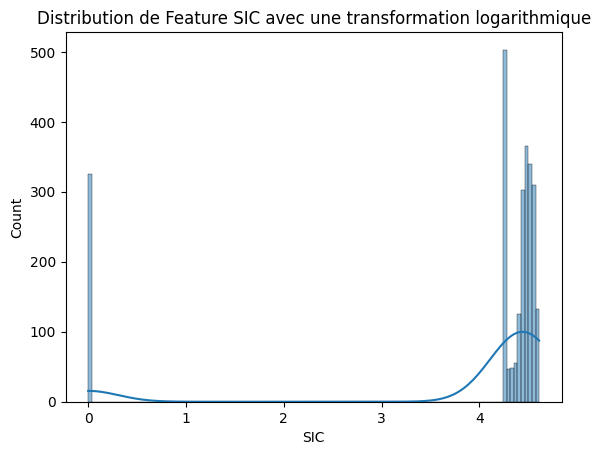

In [25]:
X_log_SIC = np.log(X['SIC'] + 1)
sns.histplot(X_log_SIC, kde=True)
plt.title('Distribution de Feature' +' SIC avec une transformation logarithmique' )
plt.show()

<Axes: title={'center': 'Distribution de SST avec une transformation Yeo-Johnson'}, ylabel='Count'>

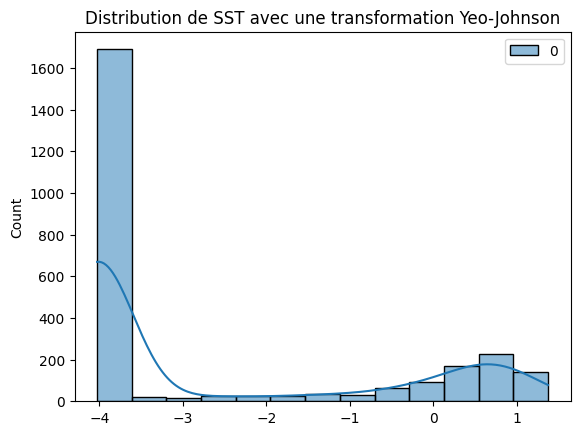

In [26]:
X_SST_YeoJohson = pd.DataFrame(stats.yeojohnson(X['SST'])[0])
plt.title('Distribution de SST avec une transformation Yeo-Johnson')
sns.histplot(X_SST_YeoJohson, kde=True)

In [27]:
print(X_SST_YeoJohson.describe())
print(X.SST.describe())

                 0
count  2556.000000
mean     -2.654035
std       2.014133
min      -4.026569
25%      -4.016339
50%      -4.016339
75%      -0.361048
max       1.375180
count    2556.000000
mean       -0.858922
std         1.446165
min        -1.692462
25%        -1.689860
50%        -1.689860
75%        -0.297573
max         6.054536
Name: SST, dtype: float64


In [28]:
print(X_transform[["SIC"]].describe())
print(X_log_SIC.describe())

               SIC
count  2556.000000
mean     73.267808
std      29.250724
min       0.000000
25%      70.000000
50%      84.601769
75%      90.362319
max      99.500682
count    2556.000000
mean        3.871875
std         1.481721
min         0.000000
25%         4.262680
50%         4.449706
75%         4.514833
max         4.610165
Name: SIC, dtype: float64


In [29]:
X_transform['SIC'] = X_log_SIC
X_transform['r1_MAR'] = X_r1_MAR_boxcox

In [30]:
from scipy.stats import skew

skewness_stats = X.apply(lambda x: skew(x))

# Affichage sous forme de tableau
skewness_df = pd.DataFrame({
    'Value': skewness_stats
})

skewness_df

,Value
t2m,-0.200338
u10,0.199832
v10,-0.240307
SST,1.814089
SIC,-1.873792
r1_MAR,3.482891
r2_MAR,3.567807
r3_MAR,3.052087
r4_MAR,4.152768
r5_MAR,2.961569


On voit que les features (t2m, u10, et v10) ne nécessite pas énormement de transformations. Au contraire celle de SIC possède une légère asymetrie vers la gauche (long tail à gauche) et mériterai Une transformation comme celle de Yeo-Johnson ou une transformation Box-Cox inversée pourrait être utile ici.De même les variables ri_MAr ainsi que SST on une asymetrie vers la droite, une transformation logarithmique ou box Cox pourrait donc être adaptée.

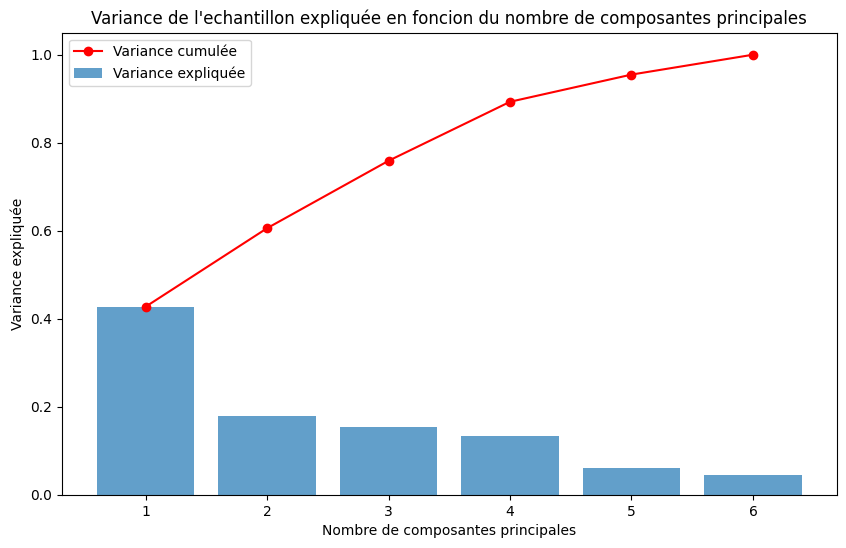

In [31]:
#Pour éviter les effets de taille
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_transform)

pca = PCA(n_components=6)
data_pca = pca.fit_transform(data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Variance expliquée')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='r', label='Variance cumulée')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée')
plt.title("Variance de l'echantillon expliquée en foncion du nombre de composantes principales")
plt.legend()
plt.show()

In [32]:
print(explained_variance_ratio.sum())

1.0000000000000002


In [33]:
data_pca = pd.DataFrame(data_pca)

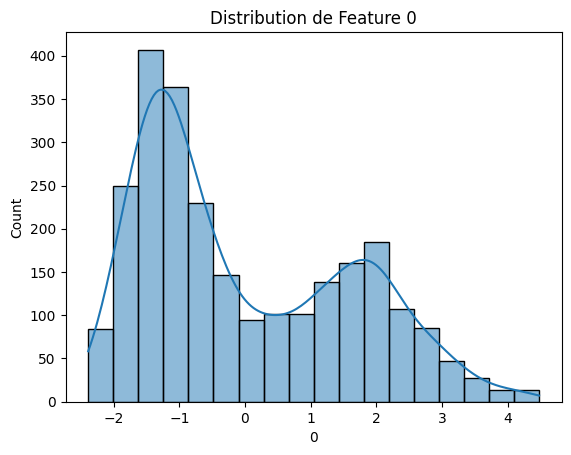

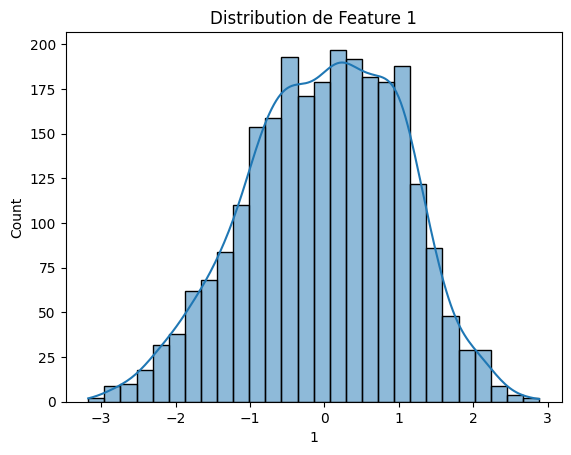

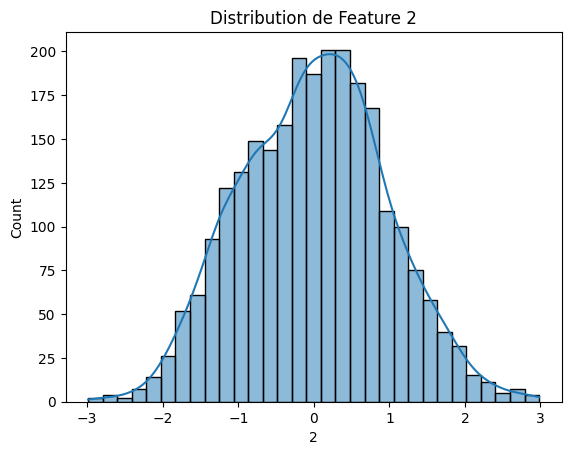

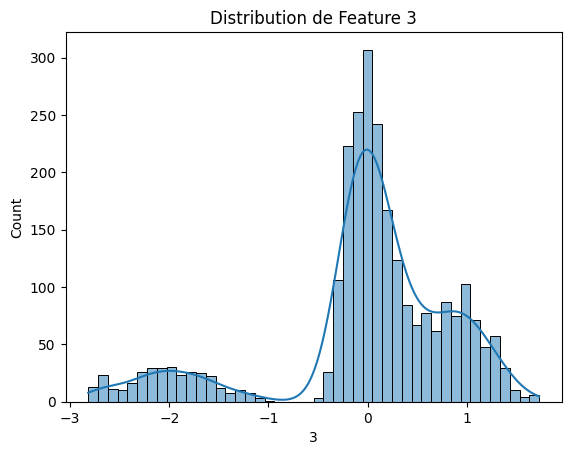

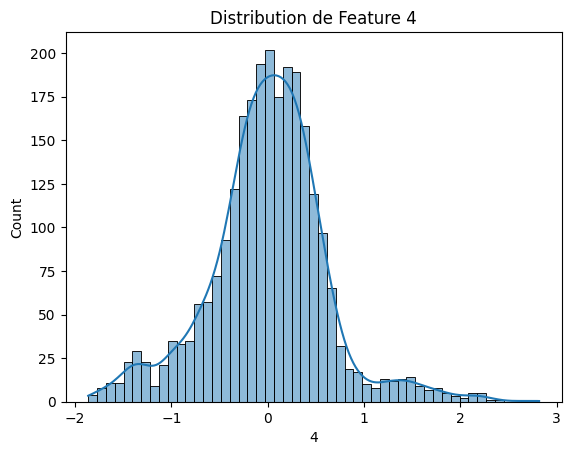

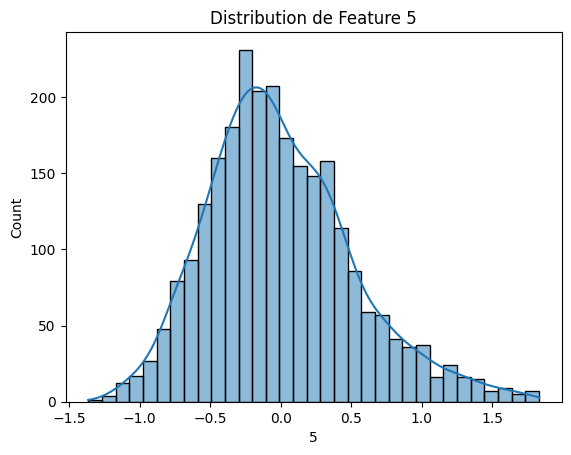

In [34]:
for c in data_pca.columns:
  sns.histplot(data_pca[c], kde=True)
  plt.title('Distribution de Feature' +' ' + str(c))
  plt.show()

Ie toute la variance de l'echantillon est capturée par les 6 premières comp principale

### Conclusion : <br>
* X = data brut <br>
* X_transform = data sans les colonnes ri_MAR sauf r1_MAR, avec transformation sur SIC, r1_MAR ainsi que SCT <br>
*  data_pca = pca sur X_transform






In [ ]:
# on ne garde que X_transform

#Modele training

Faire un grid search sur les hyper parametres des différents modèles, pourquoi pas faire du bagging en entrainant différents modèles plus 'faible', pour ensuite les regrouper avec une ensemble model <br>


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,classification_report

In [57]:
X_train, X_test,y_train,y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=1, stratify=y_transform)

param_grid = {
    'max_depth': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

RF = RandomForestClassifier(random_state=0, oob_score = True)


grid_search = GridSearchCV(estimator=RF, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_RF = grid_search.best_estimator_
y_pred = best_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Score de précision sur le test :", accuracy)
print("Rapport de classification :\n", class_report)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres trouvés : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Score de précision sur le test : 0.9374185136897001
Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       679
           1       0.78      0.64      0.70        88

    accuracy                           0.94       767
   macro avg       0.87      0.81      0.83       767
weighted avg       0.93      0.94      0.93       767



In [37]:
X_train, X_test,y_train,y_test = train_test_split(data_pca, y_transform, test_size=0.3, random_state=1, stratify=y_transform)
RF = RandomForestClassifier(max_depth=2, random_state=0, oob_score = True)
RFfit = RF.fit(X_train, y_train)
y_pred = RFfit.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(accuracy)
print(class_report)

0.8930899608865711
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       679
           1       1.00      0.07      0.13        88

    accuracy                           0.89       767
   macro avg       0.95      0.53      0.54       767
weighted avg       0.90      0.89      0.85       767



In [ ]:
## Meilleur perf sur X_transform seul ...

# Présentation finale de run

In [55]:
##Exemple de présentation finale avec pipeline en utilisant le preprocessing reflechit ci dessus
## Rajouter un grid search
#Voir si add_one ne change pas trop les données

def add_one(X):
    return X + 1


preprocessor = ColumnTransformer(
    transformers=[
        ('log', Pipeline([
            ('add_one', FunctionTransformer(add_one)),
            ('log_transform', FunctionTransformer(np.log1p))
        ]), ['SIC']),
        ('yeo-johnson', PowerTransformer(method='yeo-johnson'), ['SST']),
        ('boxcox', Pipeline([
            ('add_one', FunctionTransformer(add_one)),
            ('boxcox_transform', PowerTransformer(method='box-cox'))
        ]), ['r1_MAR']),
        ('standard', StandardScaler(), X.drop(['r5_MAR', 'r3_MAR', 'r4_MAR', 'r2_MAR'], axis=1).columns)
    ]
)

# Construire le pipeline complet
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=6)),
    ('classifier', RandomForestClassifier())
])

stratified_kfold = StratifiedKFold(n_splits=5)

# Évaluer le modèle avec validation croisée stratifiée
cv_scores = cross_val_score(pipeline, X, y_transform,
                            cv=stratified_kfold,
                            scoring='accuracy')

print("Scores de validation croisée:", cv_scores)
print("Score moyen:", cv_scores.mean())

Scores de validation croisée: [0.921875   0.95890411 0.87866928 0.88649706 0.9334638 ]
Score moyen: 0.9158818493150684
